* **Japan (Tokyo)**
    * [3/25 (171)](https://www.letsgojp.com/archives/425718)
    * [3/24 (154)](https://inews.hket.com/article/2569662)
* [**Taiwan**](https://www.twreporter.org/a/2019-ncov-epidemic)
    * For more, please refer to `data.csv`
    * 4/1 : Total 329 cases, 7 new confirmed cases (All imported)
    * 3/31: Total 322 cases, 16 new confirmed cases (14 imported and 2 domestic)
    * 3/30: Total 306 cases, 8 new confirmed cases (7 imported and 1 domestic)
    * 3/29: Total 298 cases, 15 new confirmed cases (14 imported and 1 domestic)
    * 3/28: Total 283 cases, 16 new confirmed cases (14 imported and 2 domestic)
    * 3/27: Total 267 cases, 15 new confirmed cases (All imported)
    * 3/26: Total 252 cases, 17 new confirmed cases (15 imported and 2 domestic)
    * 3/25: Total 235 cases, 19 new confirmed cases (All imported)
    * 3/24: Total 216 cases, 21 new confirmed cases (20 imported and 1 domestic)
    * 3/23: Total 195 cases, 26 new confirmed cases (25 imported and 1 domestic)
    * 3/22: Total 169 cases, 16 new confirmed cases (13 imported and 1 domestic)
    * 3/21: Total 153 cases, 18 new confirmed cases (All imported)
    * 3/20: Total 135 cases, 27 new confirmed cases (24 imported and 3 domestic)
    * 3/19: Total 108 cases, 8 new confirmed cases (7 imported and 1 domestic)
    * 3/18: Total 100 cases, 23 new confirmed cases (21 imported and 2 domestic)


In [1]:
from datetime import datetime, timedelta
import pandas as pd

data_src_file = 'data.csv'
begin_date = datetime.strptime('2020/03/18', '%Y/%m/%d')
df = pd.read_csv(data_src_file)
taiwan_cc = []
'''Taiwan confirmed cases'''

for index, row in df.iterrows():
    taiwan_cc.append((row['Total'], row['New'], row['Imported'], row['Domestic']))

df.tail()

,Total,New,Imported,Domestic
15,339,10,8,2
16,348,9,7,2
17,355,7,6,1
18,363,8,8,0
19,373,10,9,1


## Trending Line Chart

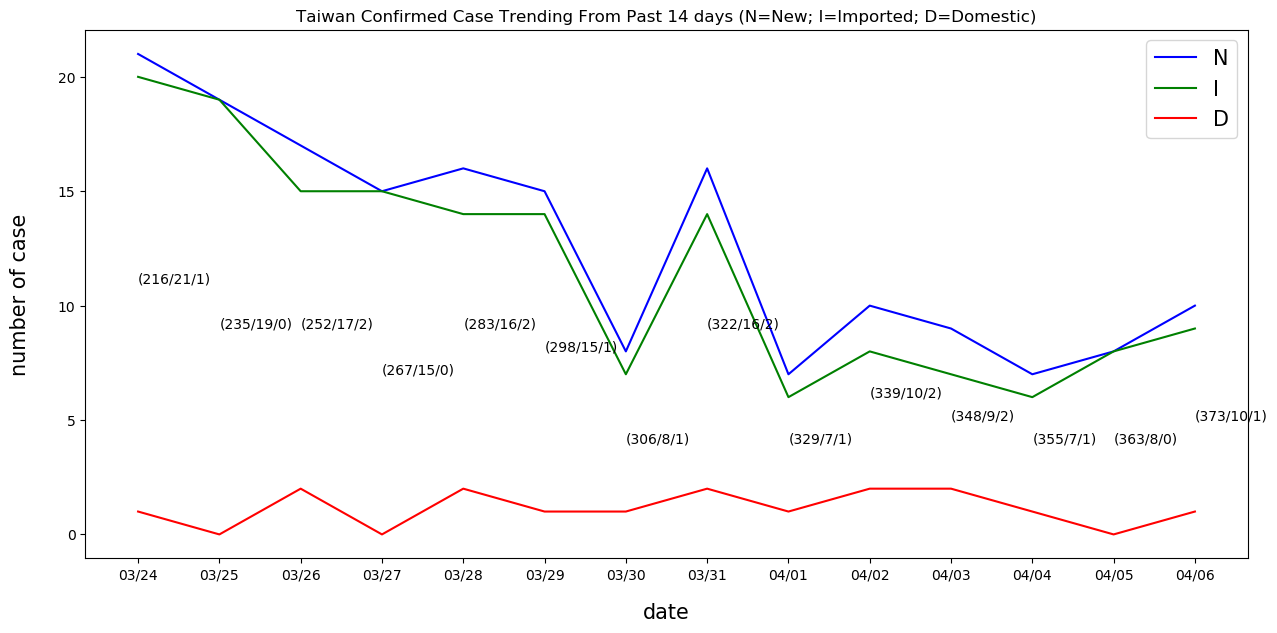

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 0) Data preparation
top_n = 14 # Keep latest 14 days
dates = []
for i in range(len(taiwan_cc)):
    d = begin_date + timedelta(days=i)
    dates.append(d.strftime('%m/%d'))
    
total_cases = []
new_cases = []
imported_cases = []
domestic_cases = []
for t in taiwan_cc[-top_n:]:
    total_cases.append(t[0])
    new_cases.append(t[1])
    imported_cases.append(t[2])
    domestic_cases.append(t[3])
    
# 1) Drawing chart
plt.figure(figsize=(15,7), dpi=100, linewidth=2)
plt.plot(dates[-top_n:], new_cases, color = 'b', label="N")
plt.plot(dates[-top_n:], imported_cases, color = 'g', label="I")
plt.plot(dates[-top_n:], domestic_cases, color = 'r', label="D")
plt.xlabel("date", fontsize=15, labelpad = 15)
plt.ylabel("number of case", fontsize=15, labelpad = 20)
plt.title('Taiwan Confirmed Case Trending From Past {} days (N=New; I=Imported; D=Domestic)'.format(top_n))
plt.legend(loc = "best", fontsize=15)

i = 0
for c, d in zip(new_cases[-top_n:], dates[-top_n:]):
    tc = total_cases[i]
    dc = domestic_cases[i]
    y = int((c + dc) / 2)
    plt.text(d, y, '({}/{}/{})'.format(total_cases[i], c, dc))
    i+=1
    
plt.show()

## Distribution of confirmed case (Imported/Domestic)

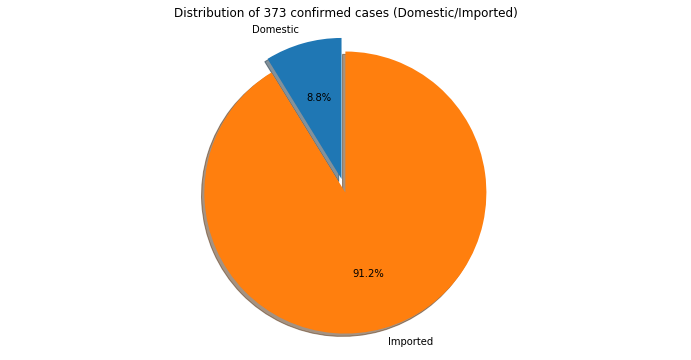

In [3]:
from functools import reduce

plt.rcParams["figure.figsize"] = (12, 6)
labels = ['Domestic', 'Imported']
domestic_number = reduce(lambda v, t: v + t[-1], taiwan_cc, 0)
imported_number = reduce(lambda v, t: v + t[-2], taiwan_cc, 0)

datas = [domestic_number, imported_number]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(datas, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of {:,d} confirmed cases (Domestic/Imported)'.format(taiwan_cc[-1][0]))
plt.show()